In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
import scipy.stats.stats as stats


import matplotlib.pyplot as plt

import matplotlib

import seaborn as sns

In [2]:
acq = pd.read_csv('C:/Users/Other/Downloads/File/acquisitions.csv')
print(acq.shape)
acq.head(5)

(9562, 12)


,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,"20,000,000.00",USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,"60,000,000.00",USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,"280,000,000.00",USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,"100,000,000.00",USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,"25,000,000.00",USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [3]:
acq = acq.drop(['term_code', 'source_url', 'source_description', 'created_at', 'updated_at'], axis=1)
print(acq.shape)
acq.head(5)

(9562, 7)


,id,acquisition_id,acquiring_object_id,acquired_object_id,price_amount,price_currency_code,acquired_at
0,1,1,c:11,c:10,"20,000,000.00",USD,2007-05-30
1,2,7,c:59,c:72,"60,000,000.00",USD,2007-07-01
2,3,8,c:24,c:132,"280,000,000.00",USD,2007-05-01
3,4,9,c:59,c:155,"100,000,000.00",USD,2007-06-01
4,5,10,c:212,c:215,"25,000,000.00",USD,2007-07-01


In [4]:
acq.isna().sum()

id                      0
acquisition_id          0
acquiring_object_id     0
acquired_object_id      1
price_amount            0
price_currency_code     4
acquired_at            29
dtype: int64

In [118]:
acq['acquired_at'] = pd.to_datetime(acq['acquired_at'])
acq['acq_year'] = acq['acquired_at'].dt.year

In [182]:
acq1 = acq[['acq_year', 'acquisition_id']].groupby('acq_year').count().reset_index()
#acq1 = acq1.sort_values(by='acquisition_id', ascending=False)
acq1 = acq1.rename(columns={'acquisition_id': "number_of_acquisitions"})
#srtdo['founding_year'] = objj1['founding_year']
#srtd = srtd.loc[(srtd['number_of_degrees'] > 1000)]
acq1

,acq_year,number_of_acquisitions
0,"1,966.00",1
1,"1,967.00",1
2,"1,974.00",1
3,"1,977.00",1
4,"1,982.00",1
5,"1,984.00",2
6,"1,986.00",2
7,"1,987.00",4
8,"1,988.00",5
9,"1,989.00",3


In [120]:
acqn = acq[['acquisition_id']].count().reset_index()
acqn

,index,0
0,acquisition_id,9562


<AxesSubplot:xlabel='acq_year'>

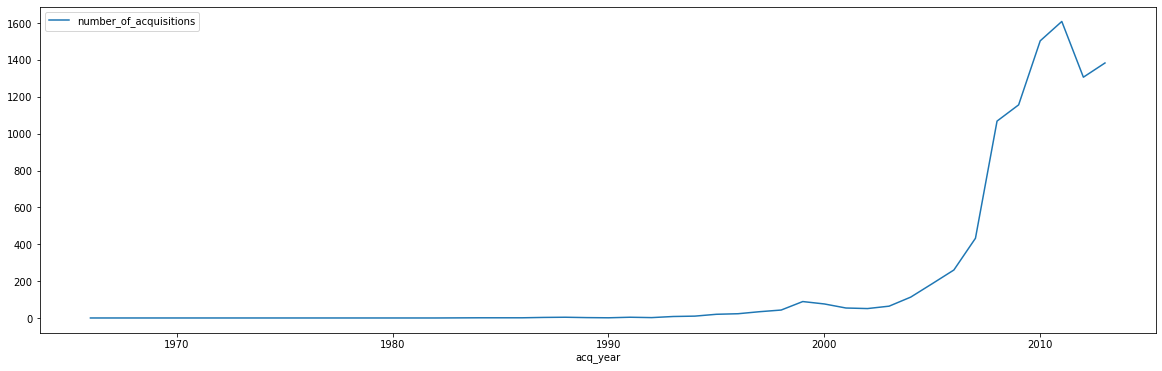

In [183]:
acq1.plot.line(x='acq_year', y='number_of_acquisitions', figsize=(20, 6))

In [5]:
deg = pd.read_csv('C:/Users/Other/Downloads/File/degrees.csv')
print(deg.shape)
deg.head(5)

(109610, 8)


,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09


In [6]:
deg = deg.drop(['created_at', 'updated_at'], axis=1)
print(deg.shape)
deg.head(5)

(109610, 6)


,id,object_id,degree_type,subject,institution,graduated_at
0,1,p:6117,MBA,NaN,NaN,NaN
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN


In [7]:
deg.isna().sum()

id                  0
object_id           0
degree_type     11218
subject         28312
institution        55
graduated_at    51556
dtype: int64

In [8]:
deg = deg.dropna(subset=['degree_type'], axis=0)
print(deg.shape)
deg.head(5)

(98392, 6)


,id,object_id,degree_type,subject,institution,graduated_at
0,1,p:6117,MBA,NaN,NaN,NaN
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN


In [151]:
degi = deg[['subject', 'object_id']].groupby('subject').count().reset_index()
srtd = degi.sort_values(by='object_id', ascending=False)
srtd = srtd.rename(columns={'object_id': "number_of_degrees"})
srtd = srtd.loc[(srtd['number_of_degrees'] > 1000)]
srtd
#degi = degi.rename(columns={'office_id': "number_of_comps_per_country"})
#srt = offi.sort_values(by='number_of_comps_per_country', ascending=False)
#srt = srt.loc[(srt['number_of_comps_per_country'] > 1000)]

,subject,number_of_degrees
3983,Computer Science,5704
5609,Economics,3356
6363,Electrical Engineering,2670
7981,Finance,2386
1950,Business Administration,2053
1817,Business,1428
13103,Mechanical Engineering,1327
11251,Law,1322
137,Accounting,1250
12131,Marketing,1230


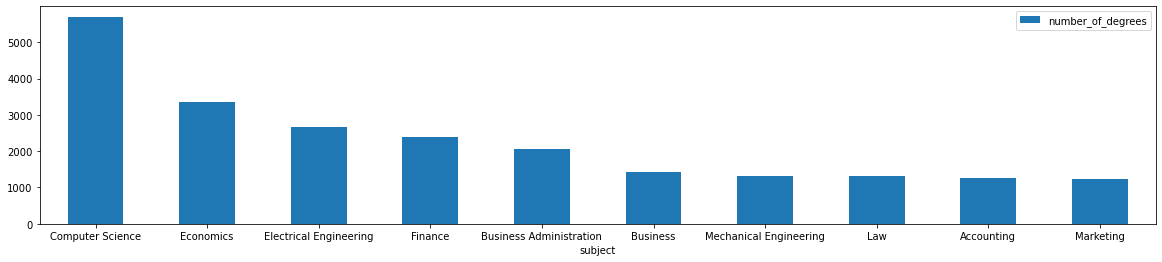

In [152]:
degi_bar = srtd.plot.bar(x='subject', y='number_of_degrees', rot=0, figsize=(20, 4))

In [9]:
fr = pd.read_csv('C:/Users/Other/Downloads/File/funding_rounds.csv')
print(fr.shape)
fr.head(5)

(52928, 23)


,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,"8,500,000.00","8,500,000.00",USD,0.00,...,0.00,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,"500,000.00","500,000.00",USD,0.00,...,0.00,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,"12,700,000.00","12,700,000.00",USD,"115,000,000.00",...,0.00,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,"27,500,000.00","27,500,000.00",USD,"525,000,000.00",...,0.00,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,"10,500,000.00","10,500,000.00",USD,0.00,...,0.00,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [10]:
fr = fr.drop(['funding_round_code','raised_amount', 'raised_currency_code', 'pre_money_valuation_usd', 'pre_money_valuation', 'pre_money_currency_code', 'post_money_valuation_usd', 'post_money_valuation', 'post_money_currency_code', 'participants','source_url', 'source_description', 'created_by', 'created_at', 'updated_at'], axis=1)
print(fr.shape)
fr.head(5)

(52928, 8)


,id,funding_round_id,object_id,funded_at,funding_round_type,raised_amount_usd,is_first_round,is_last_round
0,1,1,c:4,2006-12-01,series-b,"8,500,000.00",0,0
1,2,2,c:5,2004-09-01,angel,"500,000.00",0,1
2,3,3,c:5,2005-05-01,series-a,"12,700,000.00",0,0
3,4,4,c:5,2006-04-01,series-b,"27,500,000.00",0,0
4,5,5,c:7299,2006-05-01,series-b,"10,500,000.00",0,0


In [11]:
fr.isna().sum()

id                      0
funding_round_id        0
object_id               0
funded_at             248
funding_round_type      0
raised_amount_usd       0
is_first_round          0
is_last_round           0
dtype: int64

In [12]:
fr.dropna(subset = ['funded_at'], axis = 0)

,id,funding_round_id,object_id,funded_at,funding_round_type,raised_amount_usd,is_first_round,is_last_round
0,1,1,c:4,2006-12-01,series-b,"8,500,000.00",0,0
1,2,2,c:5,2004-09-01,angel,"500,000.00",0,1
2,3,3,c:5,2005-05-01,series-a,"12,700,000.00",0,0
3,4,4,c:5,2006-04-01,series-b,"27,500,000.00",0,0
4,5,5,c:7299,2006-05-01,series-b,"10,500,000.00",0,0
...,...,...,...,...,...,...,...,...
52923,57948,57948,c:211890,2013-12-12,series-a,"3,000,000.00",1,1
52924,57949,57949,c:267427,2010-02-06,venture,"570,000.00",0,1
52925,57950,57950,c:261728,2010-02-06,venture,"2,184,100.00",0,1
52926,57951,57951,c:285864,2013-12-12,series-a,"790,783.00",1,1


In [13]:
fn = pd.read_csv('C:/Users/Other/Downloads/File/funds.csv')
print(fn.shape)
fn.head(5)

(1564, 11)


,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,"300,000,000.00",USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,"200,750,000.00",USD,http://www.pehub.com/26725/sequoia-israel-rais...,Sequoia Israel Raises Fourth Fund,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,2008-08-11,"650,000,000.00",USD,http://venturebeat.com/2008/08/11/interwest-cl...,Venture Beat,2008-12-31 09:47:51,2008-12-31 09:47:51
3,6,6,f:192,New funds acquire,NaN,"625,000,000.00",USD,http://venturebeat.com/2008/07/28/us-venture-p...,U.S. Venture Partners raises $625M fund for ne...,2009-01-01 18:13:44,2009-01-01 18:16:27
4,7,7,f:519,Third fund,2008-05-20,"200,000,000.00",USD,http://venturebeat.com/2008/05/20/disneys-stea...,Venture Beat,2009-01-03 09:51:58,2013-09-03 16:34:54


In [14]:
fn = fn.drop(['source_url', 'source_description', 'created_at', 'updated_at'], axis=1)
print(fn.shape)
fn.head(5)

(1564, 7)


,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code
0,1,1,f:371,Second Fund,2008-12-16,"300,000,000.00",USD
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,"200,750,000.00",USD
2,5,5,f:951,Tenth fund,2008-08-11,"650,000,000.00",USD
3,6,6,f:192,New funds acquire,NaN,"625,000,000.00",USD
4,7,7,f:519,Third fund,2008-05-20,"200,000,000.00",USD


In [15]:
fn.isna().sum()

id                        0
fund_id                   0
object_id                 0
name                      0
funded_at               115
raised_amount             0
raised_currency_code      0
dtype: int64

In [16]:
inv = pd.read_csv('C:/Users/Other/Downloads/File/investments.csv')
print(inv.shape)
inv.head(5)

(80902, 6)


,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [17]:
inv = inv.drop(['created_at', 'updated_at'], axis=1)
print(inv.shape)
inv.head(5)

(80902, 4)


,id,funding_round_id,funded_object_id,investor_object_id
0,1,1,c:4,f:1
1,2,1,c:4,f:2
2,3,3,c:5,f:4
3,4,4,c:5,f:1
4,5,4,c:5,f:5


In [18]:
inv.isna().sum()

id                    0
funding_round_id      0
funded_object_id      0
investor_object_id    0
dtype: int64

In [19]:
ipo = pd.read_csv('C:/Users/Other/Downloads/File/ipos.csv')
print(ipo.shape)
ipo.head(5)

(1259, 13)


,id,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at,updated_at
0,1,1,c:1654,0.00,USD,0.00,USD,1980-12-19,NASDAQ:AAPL,NaN,NaN,2008-02-09 05:17:45,2012-04-12 04:02:59
1,2,2,c:1242,0.00,USD,0.00,NaN,1986-03-13,NASDAQ:MSFT,NaN,NaN,2008-02-09 05:25:18,2010-12-11 12:39:46
2,3,3,c:342,0.00,USD,0.00,NaN,1969-06-09,NYSE:DIS,NaN,NaN,2008-02-09 05:40:32,2010-12-23 08:58:16
3,4,4,c:59,0.00,USD,0.00,NaN,2004-08-25,NASDAQ:GOOG,NaN,NaN,2008-02-10 22:51:24,2011-08-01 20:47:08
4,5,5,c:317,"100,000,000,000.00",USD,0.00,NaN,1997-05-01,NASDAQ:AMZN,NaN,NaN,2008-02-10 23:28:09,2011-08-01 21:11:22


In [20]:
ipo = ipo.drop(['valuation_currency_code', 'raised_currency_code', 'stock_symbol', 'source_url', 'source_description', 'created_at', 'updated_at'], axis=1)
print(ipo.shape)
ipo.head(5)

(1259, 6)


,id,ipo_id,object_id,valuation_amount,raised_amount,public_at
0,1,1,c:1654,0.00,0.00,1980-12-19
1,2,2,c:1242,0.00,0.00,1986-03-13
2,3,3,c:342,0.00,0.00,1969-06-09
3,4,4,c:59,0.00,0.00,2004-08-25
4,5,5,c:317,"100,000,000,000.00",0.00,1997-05-01


In [21]:
ipo.isna().sum()

id                    0
ipo_id                0
object_id             5
valuation_amount      0
raised_amount         0
public_at           600
dtype: int64

In [22]:
ipo.dropna(subset = ['object_id'], axis = 0)

,id,ipo_id,object_id,valuation_amount,raised_amount,public_at
0,1,1,c:1654,0.00,0.00,1980-12-19
1,2,2,c:1242,0.00,0.00,1986-03-13
2,3,3,c:342,0.00,0.00,1969-06-09
3,4,4,c:59,0.00,0.00,2004-08-25
4,5,5,c:317,"100,000,000,000.00",0.00,1997-05-01
...,...,...,...,...,...,...
1254,1255,1372,c:267859,0.00,0.00,NaN
1255,1256,1373,c:39330,0.00,"725,000,000.00",2013-12-11
1256,1257,1374,c:220208,0.00,"2,350,000,000.00",2008-12-08
1257,1258,1375,c:243568,0.00,0.00,NaN


In [184]:
ipo['public_at'] = pd.to_datetime(ipo['public_at'])
ipo['ipo_year'] = ipo['public_at'].dt.year

In [185]:
ipo1 = ipo[['ipo_year', 'ipo_id']].groupby('ipo_year').count().reset_index()
#acq1 = acq1.sort_values(by='acquisition_id', ascending=False)
ipo1 = ipo1.rename(columns={'ipo_id': "number_of_ipos"})
#srtdo['founding_year'] = objj1['founding_year']
#srtd = srtd.loc[(srtd['number_of_degrees'] > 1000)]
ipo1

,ipo_year,number_of_ipos
0,"1,969.00",1
1,"1,971.00",1
2,"1,978.00",21
3,"1,979.00",1
4,"1,980.00",3
5,"1,981.00",2
6,"1,983.00",2
7,"1,984.00",1
8,"1,985.00",3
9,"1,986.00",7


<AxesSubplot:xlabel='ipo_year'>

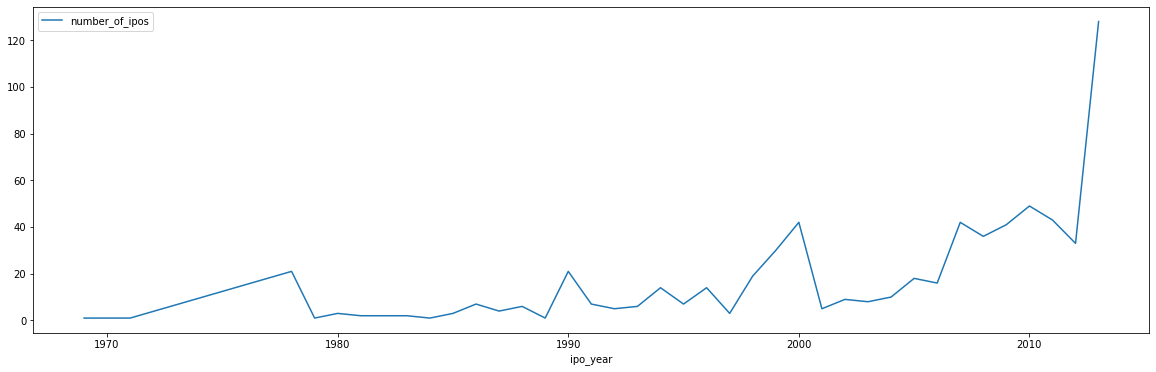

In [186]:
ipo1.plot.line(x='ipo_year', y='number_of_ipos', figsize=(20, 6))

In [2]:
obj = pd.read_csv('C:/Users/Other/Downloads/File/objects.csv')
obj['object_id'] = obj['id']
print(obj.shape)
obj.head(5)

C:\Users\Other\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(462651, 41)


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,object_id
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,3,"39,750,000.00",2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,c:1
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,0,0.00,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,c:10
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,0,0.00,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,c:100
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,0,0.00,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,c:10000
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,0,0.00,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,c:10001


In [3]:
obj = obj.drop(['parent_id', 'permalink', 'domain', 'homepage_url', 'country_code', 'first_funding_at', 'last_funding_at', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview', 'tag_list', 'city', 'region', 'first_investment_at', 'last_investment_at', 'investment_rounds', 'invested_companies', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'created_by', 'created_at', 'updated_at', 'state_code', 'closed_at'], axis=1)
print(obj.shape)
obj.head(5)

(462651, 11)


,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,funding_total_usd,object_id
0,c:1,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,"39,750,000.00",c:1
1,c:10,Company,10,Flektor,flektor,games_video,acquired,NaN,0,0.00,c:10
2,c:100,Company,100,There,there,games_video,acquired,NaN,0,0.00,c:100
3,c:10000,Company,10000,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,0,0.00,c:10000
4,c:10001,Company,10001,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,0,0.00,c:10001


In [4]:
obj.isna().sum()

id                        0
entity_type               0
entity_id                 0
name                      2
normalized_name          31
category_code        339465
status                    0
founded_at           362210
funding_rounds            0
funding_total_usd         0
object_id                 0
dtype: int64

In [6]:
objj1 = obj.loc[(obj['entity_type'] == 'Company')]
print(objj1.shape)
objj1.head(5)

(196553, 11)


,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,funding_total_usd,object_id
0,c:1,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,"39,750,000.00",c:1
1,c:10,Company,10,Flektor,flektor,games_video,acquired,NaN,0,0.00,c:10
2,c:100,Company,100,There,there,games_video,acquired,NaN,0,0.00,c:100
3,c:10000,Company,10000,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,0,0.00,c:10000
4,c:10001,Company,10001,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,0,0.00,c:10001


In [7]:
objj1['founded_at'] = pd.to_datetime(objj1['founded_at'])
objj1['founding_year'] = objj1['founded_at'].dt.year

<ipython-input-7-ddc6b72df45c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objj1['founded_at'] = pd.to_datetime(objj1['founded_at'])
<ipython-input-7-ddc6b72df45c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objj1['founding_year'] = objj1['founded_at'].dt.year


In [8]:
objj1 = objj1[['founding_year', 'name']].groupby('founding_year').count().reset_index()
srtdo = objj1.sort_values(by='name', ascending=False)
srtdo = objj1.rename(columns={'name': "number_of_companies"})
#srtdo['founding_year'] = objj1['founding_year']
#srtd = srtd.loc[(srtd['number_of_degrees'] > 1000)]
srtdo

,founding_year,number_of_companies
0,"1,901.00",5
1,"1,902.00",8
2,"1,903.00",7
3,"1,904.00",4
4,"1,905.00",3
...,...,...
109,"2,010.00",10183
110,"2,011.00",11216
111,"2,012.00",10584
112,"2,013.00",5828


In [16]:
srtdo = srtdo.loc[(srtdo['founding_year'] > 1970)]
srtdo = srtdo.loc[(srtdo['founding_year'] <= 2013)]

<AxesSubplot:xlabel='founding_year'>

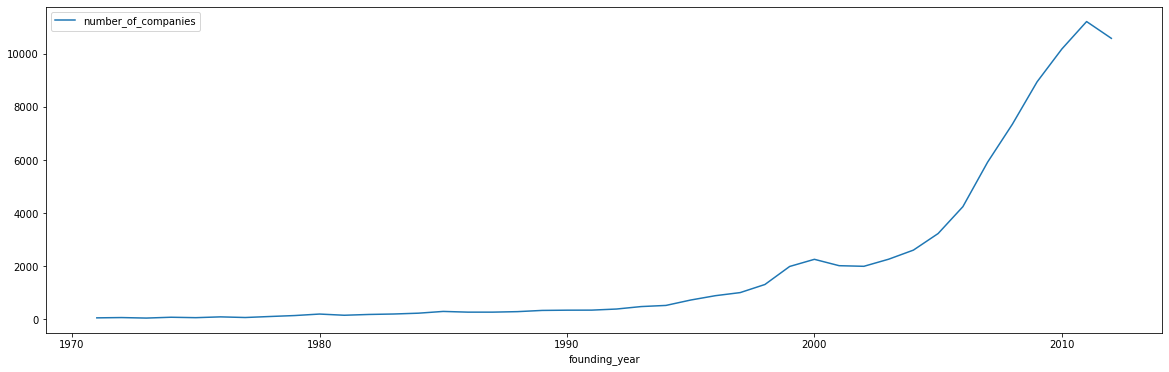

In [17]:
srtdo.plot.line(x='founding_year', y='number_of_companies', figsize=(20, 6))

In [114]:
obj['founded_at'] = pd.to_datetime(obj['founded_at'])
obj['founding_year'] = obj['founded_at'].dt.year

In [117]:
obj.sort_values(by='founding_year', ascending=True)

,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,funding_total_usd,object_id,founding_year
205705,f:665,FinancialOrg,665,Susquehanna,susquehanna,NaN,operating,1901-01-01,0,0.00,f:665,"1,901.00"
142988,c:29929,Company,29929,Nordstrom,nordstrom,other,operating,1901-01-01,0,0.00,c:29929,"1,901.00"
205316,f:6212,FinancialOrg,6212,The Gillette co.,the gillette,NaN,operating,1901-01-01,0,0.00,f:6212,"1,901.00"
3691,c:12551,Company,12551,Solutia,solutia,other,operating,1901-01-01,0,0.00,c:12551,"1,901.00"
71163,c:215403,Company,215403,The Rockefeller University,the rockefeller university,education,operating,1901-01-01,0,0.00,c:215403,"1,901.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
462646,r:9995,Product,9995,"SiteLink, listing feed for Brokerages",sitelink listing feed for brokerages,NaN,operating,NaT,0,0.00,r:9995,nan
462647,r:9996,Product,9996,"EDCLink, listing feed for Economic Development...",edclink listing feed for economic development ...,NaN,operating,NaT,0,0.00,r:9996,nan
462648,r:9997,Product,9997,"Cmail, broadcast email marketing",cmail broadcast email marketing,NaN,operating,NaT,0,0.00,r:9997,nan
462649,r:9998,Product,9998,"CatylistCRM, contact database",catylistcrm contact database,NaN,operating,NaT,0,0.00,r:9998,nan


In [26]:
off = pd.read_csv('C:/Users/Other/Downloads/File/offices.csv')
print(off.shape)
off.head(5)

(112718, 15)


,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.60,-122.33,nan,nan
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.69,-121.90,nan,nan
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.76,-122.39,nan,nan
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.42,-122.15,nan,nan
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.00,0.00,nan,nan


In [27]:
off = off.drop(['latitude', 'longitude', 'description', 'city', 'region', 'address1', 'address2', 'state_code', 'zip_code','created_at', 'updated_at'], axis=1)
print(off.shape)
off.head(5)

(112718, 4)


,id,object_id,office_id,country_code
0,1,c:1,1,USA
1,2,c:3,3,USA
2,3,c:4,4,USA
3,4,c:5,5,USA
4,5,c:7,7,ISR


In [28]:
off.isna().sum()

id              0
object_id       0
office_id       0
country_code    0
dtype: int64

In [140]:
offi = off[['country_code', 'office_id']].groupby('country_code').count().reset_index()
offi = offi.rename(columns={'office_id': "number_of_comps_per_country"})
srt = offi.sort_values(by='number_of_comps_per_country', ascending=False)
srt = srt.loc[(srt['number_of_comps_per_country'] > 1000)]

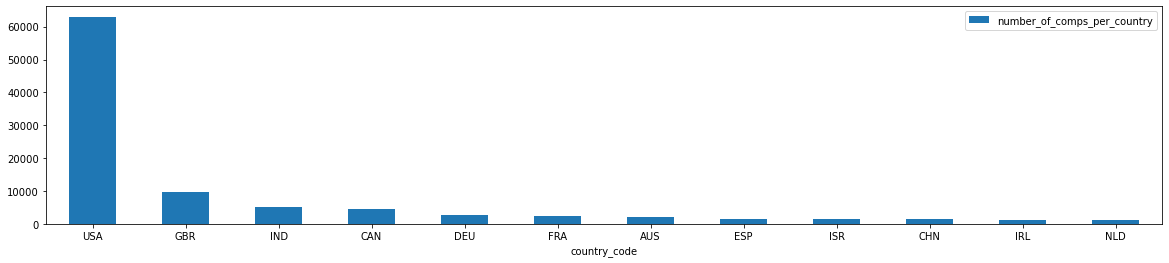

In [141]:
offi_bar = srt.plot.bar(x='country_code', y='number_of_comps_per_country', rot=0, figsize=(20, 4))

In [29]:
rel = pd.read_csv('C:/Users/Other/Downloads/File/relationships.csv')
print(rel.shape)
rel.head(5)

(402878, 11)


,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


In [30]:
rel = rel.drop(['is_past', 'sequence', 'title', 'created_at', 'updated_at'], axis=1)
print(rel.shape)

(402878, 6)


In [31]:
rel.isna().sum()

id                             0
relationship_id                0
person_object_id               0
relationship_object_id         0
start_at                  195883
end_at                    301832
dtype: int64

In [32]:
obj_rels = obj.merge(rel, left_on='id', right_on='relationship_object_id')
obj_people = obj_rels.merge(deg, left_on='person_object_id', right_on='object_id')
pplc = obj_people.groupby(['id_x', 'person_object_id']).first().reset_index()
pplc

,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,...,relationship_id,relationship_object_id,start_at,end_at,id,object_id_y,degree_type,subject,institution,graduated_at
0,c:1,p:10130,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,11362,c:1,NaN,NaN,41312,p:10130,Graduate Certificate,Product Management,"University of California, Berkeley, Walter A. ...",2008-01-01
1,c:1,p:10131,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,11363,c:1,2006-01-01,2011-01-01,41208,p:10131,MS,Education,Antioch University Seattle,2005-01-01
2,c:1,p:10132,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,11364,c:1,NaN,NaN,41570,p:10132,BS,Finance and Economics,University of Utah,1987-01-01
3,c:1,p:115553,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,137371,c:1,NaN,NaN,41210,p:115553,BA,English,Barnard College,NaN
4,c:1,p:115554,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,137372,c:1,NaN,NaN,41322,p:115554,PhD,Physics,Technische Universität München,1991-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206935,f:999,p:255377,FinancialOrg,999,Neuhaus Partners,neuhaus,NaN,operating,1998-01-01,0,...,451733,f:999,NaN,NaN,98235,p:255377,MA,"History, Journalism, Psychology, German",Justus-Liebig-Universität Giessen,NaN
206936,f:999,p:9263,FinancialOrg,999,Neuhaus Partners,neuhaus,NaN,operating,1998-01-01,0,...,10292,f:999,NaN,NaN,1972,p:9263,BA,Finance,Rutgers University,1997-01-01
206937,f:9992,p:160073,FinancialOrg,9992,remove_later1,remove later1,NaN,operating,NaN,0,...,182516,f:9992,NaN,NaN,23192,p:160073,BA,NaN,Aalborg University,2001-01-01
206938,f:9993,p:160073,FinancialOrg,9993,remove_later2,remove later2,NaN,operating,NaN,0,...,182517,f:9993,NaN,NaN,23192,p:160073,BA,NaN,Aalborg University,2001-01-01


In [33]:
people_count = pplc.groupby(by=['id_x']).size().reset_index()
num_phd = pplc[pplc['degree_type'] == 'PhD'].groupby(by=['id_x']).size().reset_index()
num_ba = pplc[pplc['degree_type'] == 'BA'].groupby(by=['id_x']).size().reset_index()
num_ma = pplc[pplc['degree_type'] == 'MA'].groupby(by=['id_x']).size().reset_index()
num_mba = pplc[pplc['degree_type'] == 'MBA'].groupby(by=['id_x']).size().reset_index()
people_count

,id_x,0
0,c:1,13
1,c:10,3
2,c:100,9
3,c:10002,1
4,c:100042,1
...,...,...
81697,f:9989,2
81698,f:999,4
81699,f:9992,1
81700,f:9993,1


In [34]:
companies = pplc.groupby(by=['id_x']).first().reset_index()
companies = companies.merge(people_count, how='left', on='id_x')
companies = companies.rename(columns={0: "people_count"})
companies = companies.merge(num_phd, how='left', on='id_x')
companies = companies.rename(columns={0: "phd_count"})
companies = companies.merge(num_ba, how='left', on='id_x')
companies = companies.rename(columns={0: "ba_count"})
companies = companies.merge(num_ma, how='left', on='id_x')
companies = companies.rename(columns={0: "ma_count"})
companies = companies.merge(num_mba, how='left', on='id_x')
companies = companies.rename(columns={0: "mba_count"})

companies['ba_count'] = companies['ba_count'].apply(lambda x: x if x >= 0 else 0)
companies['phd_count'] = companies['phd_count'].apply(lambda x: x if x >= 0 else 0)
companies['ma_count'] = companies['ma_count'].apply(lambda x: x if x >= 0 else 0)
companies['mba_count'] = companies['mba_count'].apply(lambda x: x if x >= 0 else 0)
companies

,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,...,object_id_y,degree_type,subject,institution,graduated_at,people_count,phd_count,ba_count,ma_count,mba_count
0,c:1,p:10130,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,p:10130,Graduate Certificate,Product Management,"University of California, Berkeley, Walter A. ...",2008-01-01,13,1.00,3.00,0.00,1.00
1,c:10,p:39,Company,10,Flektor,flektor,games_video,acquired,NaN,0,...,p:39,BA,Economics,University of Michigan,1992-01-01,3,0.00,2.00,0.00,0.00
2,c:100,p:1275,Company,100,There,there,games_video,acquired,NaN,0,...,p:1275,PhD,Computer Science,Stanford University,1995-01-01,9,2.00,0.00,0.00,4.00
3,c:10002,p:16911,Company,10002,Synergie Media,synergie media,advertising,operating,2007-06-27,0,...,p:16911,MS,Consultancy in Information Systems & New Techn...,ISC,NaN,1,0.00,0.00,0.00,0.00
4,c:100042,p:34456,Company,100042,HostNine,hostnine,NaN,operating,NaN,0,...,p:34456,Bachleor of Arts,Business Management,Elon University,2007-01-01,1,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81697,f:9989,p:229236,FinancialOrg,9989,Morgan Stanley International,morgan stanley international,NaN,operating,NaN,0,...,p:229236,MBA,Politics and Economics,Harvard Business School,2001-01-01,2,0.00,1.00,0.00,1.00
81698,f:999,p:121208,FinancialOrg,999,Neuhaus Partners,neuhaus,NaN,operating,1998-01-01,0,...,p:121208,MS,Economics,Universitat Hamburg,1997-01-01,4,0.00,1.00,1.00,0.00
81699,f:9992,p:160073,FinancialOrg,9992,remove_later1,remove later1,NaN,operating,NaN,0,...,p:160073,BA,NaN,Aalborg University,2001-01-01,1,0.00,1.00,0.00,0.00
81700,f:9993,p:160073,FinancialOrg,9993,remove_later2,remove later2,NaN,operating,NaN,0,...,p:160073,BA,NaN,Aalborg University,2001-01-01,1,0.00,1.00,0.00,0.00


In [35]:
companies = companies[companies['entity_type'] == 'Company']

In [36]:
companies.drop(['degree_type', 'subject', 'institution', 'graduated_at'], axis=1)

,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,...,relationship_object_id,start_at,end_at,id,object_id_y,people_count,phd_count,ba_count,ma_count,mba_count
0,c:1,p:10130,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,c:1,2006-01-01,2011-01-01,41312,p:10130,13,1.00,3.00,0.00,1.00
1,c:10,p:39,Company,10,Flektor,flektor,games_video,acquired,NaN,0,...,c:10,2006-05-01,2008-03-01,16899,p:39,3,0.00,2.00,0.00,0.00
2,c:100,p:1275,Company,100,There,there,games_video,acquired,NaN,0,...,c:100,2000-01-01,2003-01-01,33235,p:1275,9,2.00,0.00,0.00,4.00
3,c:10002,p:16911,Company,10002,Synergie Media,synergie media,advertising,operating,2007-06-27,0,...,c:10002,NaN,NaN,102208,p:16911,1,0.00,0.00,0.00,0.00
4,c:100042,p:34456,Company,100042,HostNine,hostnine,NaN,operating,NaN,0,...,c:100042,2011-06-20,NaN,3072,p:34456,1,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76712,c:99772,p:108533,Company,99772,Two3 Design,two3 design,NaN,operating,NaN,0,...,c:99772,2000-08-01,2005-11-01,16015,p:108533,1,0.00,1.00,0.00,0.00
76713,c:99779,p:221236,Company,99779,Locanetworks,locanetworks,NaN,operating,NaN,0,...,c:99779,2011-02-01,2011-03-01,64650,p:221236,1,0.00,0.00,0.00,0.00
76714,c:99937,p:118921,Company,99937,Unification Energy Corp.,unification energy,cleantech,operating,2008-12-25,0,...,c:99937,NaN,NaN,17572,p:118921,1,0.00,0.00,0.00,0.00
76715,c:9996,p:103906,Company,9996,CSC,csc,consulting,operating,1959-01-01,0,...,c:9996,2007-01-01,2009-01-01,81518,p:103906,38,0.00,3.00,1.00,6.00


In [37]:
companies['num_degrees'] = companies.apply(lambda row: row['phd_count'] + row['ma_count'] + row['mba_count'] + row['ba_count'], axis=1)
companies['have_degree'] = companies['num_degrees'].apply(lambda x: x > 0)

<ipython-input-37-b03f1b895d5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies['num_degrees'] = companies.apply(lambda row: row['phd_count'] + row['ma_count'] + row['mba_count'] + row['ba_count'], axis=1)
<ipython-input-37-b03f1b895d5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies['have_degree'] = companies['num_degrees'].apply(lambda x: x > 0)


In [38]:
# mod = smf.ols("funding_rounds ~ phd_count", data=companies)
# relations_phd_funding = mod.fit()
# relations_phd_funding.params
# relations_phd_funding.summary()

In [39]:
ipo_companies = companies.merge(ipo, how='left', left_on='id_x', right_on='object_id')
print(ipo_companies.shape)
ipo_companies['has_ipoed'] = ipo_companies['ipo_id'].apply(lambda x: 1 if x > 0 else 0)
ipo_companies.head()

(76718, 36)


,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,...,mba_count,num_degrees,have_degree,id_y,ipo_id,object_id,valuation_amount,raised_amount,public_at,has_ipoed
0,c:1,p:10130,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,1.00,5.00,True,nan,nan,NaN,nan,nan,NaN,0
1,c:10,p:39,Company,10,Flektor,flektor,games_video,acquired,NaN,0,...,0.00,2.00,True,nan,nan,NaN,nan,nan,NaN,0
2,c:100,p:1275,Company,100,There,there,games_video,acquired,NaN,0,...,4.00,6.00,True,nan,nan,NaN,nan,nan,NaN,0
3,c:10002,p:16911,Company,10002,Synergie Media,synergie media,advertising,operating,2007-06-27,0,...,0.00,0.00,False,nan,nan,NaN,nan,nan,NaN,0
4,c:100042,p:34456,Company,100042,HostNine,hostnine,NaN,operating,NaN,0,...,0.00,0.00,False,nan,nan,NaN,nan,nan,NaN,0


In [40]:
mod = logit("has_ipoed ~ ba_count", data=ipo_companies)
relations_phd_ipo = mod.fit()
relations_phd_ipo.params
relations_phd_ipo.summary2()

Optimization terminated successfully.
         Current function value: 0.061476
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.074      
Dependent Variable: has_ipoed        AIC:              9436.5965  
Date:               2021-06-29 14:10 BIC:              9455.0923  
No. Observations:   76718            Log-Likelihood:   -4716.3    
Df Model:           1                LL-Null:          -5094.0    
Df Residuals:       76716            LLR p-value:      2.5676e-166
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -4.6564    0.0370  -125.7954  0.0000  -4.7289  -4.5838
ba_count      0.3547    0.0146    24.2770  0.0000   0.3261   0.3833
==================================================================

"""

In [41]:
mod = logit("has_ipoed ~ ba_count + ma_count + mba_count + phd_count", data=ipo_companies)
relations_phd_ipo = mod.fit()
relations_phd_ipo.params
relations_phd_ipo.summary2()

Optimization terminated successfully.
         Current function value: 0.060056
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.096      
Dependent Variable: has_ipoed        AIC:              9224.7222  
Date:               2021-06-29 14:10 BIC:              9270.9617  
No. Observations:   76718            Log-Likelihood:   -4607.4    
Df Model:           4                LL-Null:          -5094.0    
Df Residuals:       76713            LLR p-value:      2.1116e-209
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -4.7117    0.0378  -124.5374  0.0000  -4.7858  -4.6375
ba_count      0.2289    0.0211    10.8635  0.0000   0.1876   0.2702
ma_count     -0.4769    0.1560    -3.0566  0.0022  -0.7827  -0.1711
mba_count     0.0973    0.0168     5.7797  0.0000   0.0643   0.1302
phd_count     0.3928    0.0328    11.9625  0.0000   0.3285   0.4572
==================================================================

"""

In [42]:
mod = logit("has_ipoed ~ ma_count", data=ipo_companies)
relations_phd_ipo = mod.fit()
relations_phd_ipo.params
relations_phd_ipo.summary2()

Optimization terminated successfully.
         Current function value: 0.065117
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.019     
Dependent Variable: has_ipoed        AIC:              9995.2793 
Date:               2021-06-29 14:10 BIC:              10013.7751
No. Observations:   76718            Log-Likelihood:   -4995.6   
Df Model:           1                LL-Null:          -5094.0   
Df Residuals:       76716            LLR p-value:      1.0386e-44
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
             Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept   -4.4614    0.0341  -130.8666  0.0000  -4.5282  -4.3945
ma_count     1.1074    0.0810    13.6686  0.0000   0.9486   1.2662
=================================================================

"""

In [43]:
mod = logit("has_ipoed ~ mba_count", data=ipo_companies)
relations_phd_ipo = mod.fit()
relations_phd_ipo.params
relations_phd_ipo.summary2()

Optimization terminated successfully.
         Current function value: 0.061736
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.070      
Dependent Variable: has_ipoed        AIC:              9476.4968  
Date:               2021-06-29 14:10 BIC:              9494.9926  
No. Observations:   76718            Log-Likelihood:   -4736.2    
Df Model:           1                LL-Null:          -5094.0    
Df Residuals:       76716            LLR p-value:      1.2177e-157
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -4.6222    0.0364  -126.9040  0.0000  -4.6936  -4.5509
mba_count     0.2699    0.0118    22.9057  0.0000   0.2468   0.2930
==================================================================

"""

In [44]:
mod = logit("has_ipoed ~ phd_count", data=ipo_companies)
relations_phd_ipo = mod.fit()
relations_phd_ipo.params
relations_phd_ipo.summary2()

Optimization terminated successfully.
         Current function value: 0.062826
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.054      
Dependent Variable: has_ipoed        AIC:              9643.8275  
Date:               2021-06-29 14:10 BIC:              9662.3233  
No. Observations:   76718            Log-Likelihood:   -4819.9    
Df Model:           1                LL-Null:          -5094.0    
Df Residuals:       76716            LLR p-value:      3.0100e-121
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -4.5501    0.0353  -128.8548  0.0000  -4.6193  -4.4809
phd_count     0.6247    0.0278    22.5019  0.0000   0.5703   0.6791
==================================================================

"""

In [45]:
mod = logit("has_ipoed ~ category_code", data=ipo_companies)
relations_phd_ipo = mod.fit()
relations_phd_ipo.params
relations_phd_ipo.summary2()

         Current function value: 0.119426
         Iterations: 35


C:\Users\Other\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Logit
====================================================================================================
Model:                          Logit                       Pseudo R-squared:            0.085      
Dependent Variable:             has_ipoed                   AIC:                         7562.7253  
Date:                           2021-06-29 14:10            BIC:                         7913.4978  
No. Observations:               31311                       Log-Likelihood:              -3739.4    
Df Model:                       41                          LL-Null:                     -4084.9    
Df Residuals:                   31269                       LLR p-value:                 5.5711e-119
Converged:                      0.0000                      Scale:                       1.0000     
No. Iterations:                 35.0000                                                             
----------------------------------------------------------------------------------------------------
                                   Coef.     Std.Err.      z     P>|z|      [0.025         0.975]   
----------------------------------------------------------------------------------------------------
Intercept                          -4.2936       0.2147 -20.0025 0.0000        -4.7143       -3.8729
category_code[T.analytics]         -1.2824       0.7402  -1.7324 0.0832        -2.7332        0.1685
category_code[T.automotive]         1.0164       0.7516   1.3523 0.1763        -0.4567        2.4896
category_code[T.biotech]            2.2518       0.2272   9.9090 0.0000         1.8064        2.6972
category_code[T.cleantech]          1.3732       0.2830   4.8527 0.0000         0.8186        1.9278
category_code[T.consulting]         0.1141       0.3373   0.3382 0.7352        -0.5470        0.7751
category_code[T.design]           -15.3015    2544.0435  -0.0060 0.9952     -5001.5352     4970.9322
category_code[T.ecommerce]         -0.2189       0.3108  -0.7043 0.4812        -0.8282        0.3903
category_code[T.education]         -1.0196       0.6173  -1.6518 0.0986        -2.2295        0.1902
category_code[T.enterprise]         0.8044       0.2582   3.1148 0.0018         0.2982        1.3105
category_code[T.fashion]            0.4364       0.6217   0.7019 0.4827        -0.7821        1.6548
category_code[T.finance]            0.3691       0.4166   0.8861 0.3756        -0.4474        1.1856
category_code[T.games_video]        0.1807       0.2945   0.6137 0.5394        -0.3965        0.7579
category_code[T.government]       -16.4122    8694.1670  -0.0019 0.9985    -17056.6665    17023.8421
category_code[T.hardware]           2.0871       0.2480   8.4166 0.0000         1.6011        2.5732
category_code[T.health]             0.2984       0.4646   0.6424 0.5206        -0.6121        1.2089
category_code[T.hospitality]        0.3552       0.6212   0.5718 0.5674        -0.8623        1.5728
category_code[T.legal]             -0.5105       1.0268  -0.4971 0.6191        -2.5229        1.5020
category_code[T.local]            -13.5387     884.2941  -0.0153 0.9878     -1746.7233     1719.6459
category_code[T.manufacturing]      1.5573       0.4452   3.4982 0.0005         0.6848        2.4299
category_code[T.medical]            0.9015       0.3742   2.4090 0.0160         0.1680        1.6350
category_code[T.messaging]          0.8047       0.5511   1.4601 0.1443        -0.2755        1.8848
category_code[T.mobile]             0.3137       0.2663   1.1778 0.2389        -0.2083        0.8356
category_code[T.music]             -0.6481       1.0263  -0.6315 0.5277        -2.6595        1.3634
category_code[T.nanotech]           0.7971       1.0375   0.7683 0.4423        -1.2364        2.8305
category_code[T.network_hosting]    1.2731       0.2890   4.4051 0.0000         0.7067        1.8396
category_code[T.news]               0.9820       0.4406

In [46]:
only_ipo = ipo_companies[ipo_companies['has_ipoed'] == 1]
only_ipo.groupby(by='have_degree').size()

have_degree
False    134
True     811
dtype: int64

In [47]:
print('Median: ' + str(only_ipo['num_degrees'].median()))
print('Mean: ' + str(only_ipo['num_degrees'].mean()))

Median: 3.0
Mean: 8.741798941798942


In [48]:
only_ipo.groupby(by='ba_count').size()

ba_count
0.00      375
1.00      211
2.00      111
3.00       76
4.00       42
5.00       26
6.00       19
7.00       13
8.00       12
9.00        7
10.00       4
11.00       5
12.00       2
13.00       3
14.00       1
15.00       5
16.00       1
17.00       3
18.00       5
19.00       1
20.00       1
21.00       2
23.00       1
25.00       1
26.00       2
27.00       1
29.00       1
34.00       2
35.00       1
38.00       1
40.00       1
42.00       1
43.00       1
52.00       1
59.00       1
69.00       1
76.00       1
120.00      1
123.00      1
154.00      1
dtype: int64

In [49]:
only_ipo.groupby(by='ma_count').size()

ma_count
0.00     836
1.00      79
2.00      18
3.00       3
4.00       3
7.00       1
8.00       1
9.00       2
14.00      1
15.00      1
dtype: int64

In [50]:
only_ipo.groupby(by='mba_count').size()

mba_count
0.00      294
1.00      213
2.00      117
3.00       72
4.00       56
5.00       39
6.00       26
7.00       18
8.00       15
9.00       11
10.00      10
11.00      12
12.00       3
13.00       6
14.00       1
15.00       7
16.00       2
17.00       4
18.00       4
19.00       3
20.00       1
21.00       3
22.00       2
23.00       1
26.00       1
27.00       1
28.00       2
29.00       3
33.00       1
37.00       1
50.00       1
51.00       1
53.00       1
58.00       1
67.00       1
75.00       1
76.00       1
83.00       1
98.00       1
107.00      2
112.00      1
125.00      1
126.00      1
154.00      1
162.00      1
dtype: int64

In [51]:
acquired_companies = companies.merge(acq, how='left', left_on='id_x', right_on='acquired_object_id')
acquired_companies['has_been_acquired'] = acquired_companies['acquisition_id'].apply(lambda x: 1 if x > 0 else 0)
acquired_companies

,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,...,num_degrees,have_degree,id_y,acquisition_id,acquiring_object_id,acquired_object_id,price_amount,price_currency_code,acquired_at,has_been_acquired
0,c:1,p:10130,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,5.00,True,nan,nan,NaN,NaN,nan,NaN,NaN,0
1,c:10,p:39,Company,10,Flektor,flektor,games_video,acquired,NaN,0,...,2.00,True,1.00,1.00,c:11,c:10,"20,000,000.00",USD,2007-05-30,1
2,c:100,p:1275,Company,100,There,there,games_video,acquired,NaN,0,...,6.00,True,14.00,20.00,c:377,c:100,0.00,USD,2005-05-29,1
3,c:10002,p:16911,Company,10002,Synergie Media,synergie media,advertising,operating,2007-06-27,0,...,0.00,False,nan,nan,NaN,NaN,nan,NaN,NaN,0
4,c:100042,p:34456,Company,100042,HostNine,hostnine,NaN,operating,NaN,0,...,0.00,False,nan,nan,NaN,NaN,nan,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76818,c:99772,p:108533,Company,99772,Two3 Design,two3 design,NaN,operating,NaN,0,...,1.00,True,nan,nan,NaN,NaN,nan,NaN,NaN,0
76819,c:99779,p:221236,Company,99779,Locanetworks,locanetworks,NaN,operating,NaN,0,...,0.00,False,nan,nan,NaN,NaN,nan,NaN,NaN,0
76820,c:99937,p:118921,Company,99937,Unification Energy Corp.,unification energy,cleantech,operating,2008-12-25,0,...,0.00,False,nan,nan,NaN,NaN,nan,NaN,NaN,0
76821,c:9996,p:103906,Company,9996,CSC,csc,consulting,operating,1959-01-01,0,...,10.00,True,nan,nan,NaN,NaN,nan,NaN,NaN,0


In [52]:
mod = logit("has_been_acquired ~ have_degree", data=acquired_companies)
relations_phd_acq = mod.fit()
relations_phd_acq.params
relations_phd_acq.summary2()

Optimization terminated successfully.
         Current function value: 0.209173
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared: 0.025      
Dependent Variable:   has_been_acquired AIC:              32142.5362 
Date:                 2021-06-29 14:10  BIC:              32161.0347 
No. Observations:     76823             Log-Likelihood:   -16069.    
Df Model:             1                 LL-Null:          -16478.    
Df Residuals:         76821             LLR p-value:      1.3268e-179
Converged:            1.0000            Scale:            1.0000     
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept           -3.3917   0.0285 -118.8385 0.0000 -3.4476 -3.3357
have_degree[T.True]  0.9383   0.0343   27.3505 0.0000  0.8710  1.0055
=====================================================================

"""

In [53]:
mod = logit("has_been_acquired ~ ba_count", data=acquired_companies)
relations_phd_acq = mod.fit()
relations_phd_acq.params
relations_phd_acq.summary2()

Optimization terminated successfully.
         Current function value: 0.212914
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit             Pseudo R-squared: 0.007     
Dependent Variable: has_been_acquired AIC:              32717.4234
Date:               2021-06-29 14:10  BIC:              32735.9219
No. Observations:   76823             Log-Likelihood:   -16357.   
Df Model:           1                 LL-Null:          -16478.   
Df Residuals:       76821             LLR p-value:      1.6637e-54
Converged:          1.0000            Scale:            1.0000    
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -2.8997    0.0167  -174.0306  0.0000  -2.9323  -2.8670
ba_count      0.1363    0.0098    13.8933  0.0000   0.1171   0.1555
==================================================================

"""

In [54]:
mod = logit("has_been_acquired ~ ba_count + ma_count + mba_count + phd_count", data=acquired_companies)
relations_phd_acq = mod.fit()
relations_phd_acq.params
relations_phd_acq.summary2()

Optimization terminated successfully.
         Current function value: 0.212670
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit             Pseudo R-squared: 0.008     
Dependent Variable: has_been_acquired AIC:              32685.8215
Date:               2021-06-29 14:10  BIC:              32732.0678
No. Observations:   76823             Log-Likelihood:   -16338.   
Df Model:           4                 LL-Null:          -16478.   
Df Residuals:       76818             LLR p-value:      3.1303e-59
Converged:          1.0000            Scale:            1.0000    
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -2.8952    0.0167  -173.7532  0.0000  -2.9279  -2.8625
ba_count      0.1705    0.0132    12.8687  0.0000   0.1445   0.1965
ma_count     -0.3146    0.0894    -3.5201  0.0004  -0.4898  -0.1394
mba_count     0.0054    0.0085     0.6330  0.5267  -0.0113   0.0222
phd_count    -0.1417    0.0360    -3.9370  0.0001  -0.2122  -0.0711
==================================================================

"""

In [106]:
mod = logit("has_been_acquired ~ ma_count", data=acquired_companies)
relations_ma_acq = mod.fit()
relations_ma_acq.params
relations_ma_acq.summary2()

Optimization terminated successfully.
         Current function value: 0.214303
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit             Pseudo R-squared: 0.001     
Dependent Variable: has_been_acquired AIC:              32930.7248
Date:               2021-06-29 14:15  BIC:              32949.2234
No. Observations:   76823             Log-Likelihood:   -16463.   
Df Model:           1                 LL-Null:          -16478.   
Df Residuals:       76821             LLR p-value:      9.8049e-08
Converged:          1.0000            Scale:            1.0000    
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -2.8447    0.0159  -178.5792  0.0000  -2.8759  -2.8135
ma_count      0.2902    0.0522     5.5556  0.0000   0.1878   0.3926
==================================================================

"""

In [56]:
mod = logit("has_been_acquired ~ mba_count", data=acquired_companies)
relations_phd_acq = mod.fit()
relations_phd_acq.params
relations_phd_acq.summary2()

Optimization terminated successfully.
         Current function value: 0.213795
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit             Pseudo R-squared: 0.003     
Dependent Variable: has_been_acquired AIC:              32852.6886
Date:               2021-06-29 14:10  BIC:              32871.1871
No. Observations:   76823             Log-Likelihood:   -16424.   
Df Model:           1                 LL-Null:          -16478.   
Df Residuals:       76821             LLR p-value:      5.8805e-25
Converged:          1.0000            Scale:            1.0000    
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -2.8621    0.0162  -177.0101  0.0000  -2.8938  -2.8304
mba_count     0.0529    0.0063     8.3697  0.0000   0.0405   0.0653
==================================================================

"""

In [57]:
mod = logit("has_been_acquired ~ phd_count", data=acquired_companies)
relations_phd_acq = mod.fit()
relations_phd_acq.params
relations_phd_acq.summary2()

Optimization terminated successfully.
         Current function value: 0.214336
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit             Pseudo R-squared: 0.001     
Dependent Variable: has_been_acquired AIC:              32935.7943
Date:               2021-06-29 14:10  BIC:              32954.2928
No. Observations:   76823             Log-Likelihood:   -16466.   
Df Model:           1                 LL-Null:          -16478.   
Df Residuals:       76821             LLR p-value:      1.3556e-06
Converged:          1.0000            Scale:            1.0000    
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -2.8450    0.0159  -178.3867  0.0000  -2.8763  -2.8138
phd_count     0.0913    0.0174     5.2424  0.0000   0.0572   0.1254
==================================================================

"""

In [58]:
mod = logit("has_been_acquired ~ category_code", data=acquired_companies)
relations_phd_acq = mod.fit()
relations_phd_acq.params
relations_phd_acq.summary2()

         Current function value: 0.341150
         Iterations: 35


C:\Users\Other\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
=========================================================================================
Model:                      Logit                    Pseudo R-squared:        0.031      
Dependent Variable:         has_been_acquired        AIC:                     21511.6452 
Date:                       2021-06-29 14:10         BIC:                     21862.5436 
No. Observations:           31405                    Log-Likelihood:          -10714.    
Df Model:                   41                       LL-Null:                 -11052.    
Df Residuals:               31363                    LLR p-value:             8.5804e-116
Converged:                  0.0000                   Scale:                   1.0000     
No. Iterations:             35.0000                                                      
-----------------------------------------------------------------------------------------
                                   Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
-----------------------------------------------------------------------------------------
Intercept                          -1.9855    0.0758 -26.1980 0.0000    -2.1341   -1.8370
category_code[T.analytics]         -0.8279    0.2027  -4.0848 0.0000    -1.2251   -0.4307
category_code[T.automotive]        -0.8671    0.5986  -1.4486 0.1475    -2.0403    0.3061
category_code[T.biotech]            0.1529    0.1025   1.4927 0.1355    -0.0479    0.3538
category_code[T.cleantech]         -0.3009    0.1594  -1.8872 0.0591    -0.6133    0.0116
category_code[T.consulting]        -0.9770    0.1649  -5.9233 0.0000    -1.3003   -0.6537
category_code[T.design]            -1.1925    0.7257  -1.6434 0.1003    -2.6148    0.2297
category_code[T.ecommerce]         -0.5899    0.1181  -4.9933 0.0000    -0.8215   -0.3584
category_code[T.education]         -1.9265    0.3012  -6.3953 0.0000    -2.5169   -1.3361
category_code[T.enterprise]         0.1834    0.1029   1.7815 0.0748    -0.0184    0.3852
category_code[T.fashion]           -1.1572    0.4238  -2.7305 0.0063    -1.9878   -0.3266
category_code[T.finance]           -1.1030    0.2526  -4.3657 0.0000    -1.5982   -0.6078
category_code[T.games_video]       -0.0081    0.1087  -0.0747 0.9404    -0.2212    0.2050
category_code[T.government]       -14.6834 1155.1689  -0.0127 0.9899 -2278.7729 2249.4061
category_code[T.hardware]          -0.0364    0.1381  -0.2637 0.7920    -0.3071    0.2342
category_code[T.health]            -0.9338    0.2603  -3.5879 0.0003    -1.4440   -0.4237
category_code[T.hospitality]       -1.6586    0.5121  -3.2387 0.0012    -2.6624   -0.6549
category_code[T.legal]             -2.1171    0.7169  -2.9530 0.0031    -3.5223   -0.7119
category_code[T.local]             -2.2630    1.0100  -2.2406 0.0250    -4.2425   -0.2835
category_code[T.manufacturing]     -0.7507    0.3973  -1.8894 0.0588    -1.5294    0.0280
category_code[T.medical]           -1.3165    0.3036  -4.3369 0.0000    -1.9114   -0.7215
category_code[T.messaging]          0.0480    0.2703   0.1778 0.8589    -0.4817    0.5778
category_code[T.mobile]            -0.0490    0.1005  -0.4874 0.6260    -0.2461    0.1481
category_code[T.music]             -0.4841    0.3230  -1.4987 0.1340    -1.1172    0.1490
category_code[T.nanotech]          -1.5110    1.0179  -1.4845 0.1377    -3.5060    0.4840
category_code[T.network_hosting]    0.5868    0.1270   4.6196 0.0000     0.3378    0.8358
category_code[T.news]              -0.0069    0.2304  -0.0300 0.9761    -0.4585    0.4447
category_code[T.nonprofit]        -13.0808  223.3888  -0.0586 0.9533  -450.9148  424.7532
category_code[T.other]             -0.8100    0.1259  -6.4341 0.0000    -1.0568   -0.5633
category_code[T.pets]             -16.7348 2665.0002  -0.0063 0.9950 -5240.0392 5206.5696
category_code[T.photo_video]       -0.5794    0.3746  -1.5466 0.1220    -1.3137    0.1549
category_code[T.public_relati

In [59]:
only_acquired = acquired_companies[acquired_companies['has_been_acquired'] == 1]
only_acquired.groupby(by='have_degree').size()
# Compared to IPOs, there are more acquisitions of companies with founders that have *no degrees* 134-811 vs 1269-2997

have_degree
False    1269
True     2997
dtype: int64

In [60]:
print('Median: ' + str(only_acquired['num_degrees'].median()))
print('Mean: ' + str(only_acquired['num_degrees'].mean()))

Median: 1.0
Mean: 2.0206282231598687


In [61]:
only_acquired.groupby(by='ma_count').size().head(5)

ma_count
0.00    4072
1.00     175
2.00      17
5.00       1
6.00       1
dtype: int64

In [62]:
only_acquired.groupby(by='mba_count').size().head(5)

mba_count
0.00    2348
1.00    1113
2.00     401
3.00     167
4.00      89
dtype: int64

In [63]:
only_acquired.groupby(by='ba_count').size().head(5)

ba_count
0.00    2456
1.00    1072
2.00     385
3.00     163
4.00      76
dtype: int64

In [64]:
only_acquired.groupby(by='phd_count').size().head(5)

phd_count
0.00    3760
1.00     418
2.00      54
3.00      17
4.00       9
dtype: int64

In [65]:
# company_funding_rounds = companies.merge(fr, left_on='id_x', right_on='object_id')
# company_funding_rounds

In [66]:
# Useless
# company_funding_amounts = company_funding_rounds.groupby(by='object_id').sum('raised_amount_usd').reset_index()
# company_funding_amounts

In [67]:
companies['has_been_funded'] = companies['funding_total_usd'].apply(lambda x: 1 if x > 0 else 0)
companies

<ipython-input-67-4377df3673f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies['has_been_funded'] = companies['funding_total_usd'].apply(lambda x: 1 if x > 0 else 0)


,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,...,institution,graduated_at,people_count,phd_count,ba_count,ma_count,mba_count,num_degrees,have_degree,has_been_funded
0,c:1,p:10130,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,"University of California, Berkeley, Walter A. ...",2008-01-01,13,1.00,3.00,0.00,1.00,5.00,True,1
1,c:10,p:39,Company,10,Flektor,flektor,games_video,acquired,NaN,0,...,University of Michigan,1992-01-01,3,0.00,2.00,0.00,0.00,2.00,True,0
2,c:100,p:1275,Company,100,There,there,games_video,acquired,NaN,0,...,Stanford University,1995-01-01,9,2.00,0.00,0.00,4.00,6.00,True,0
3,c:10002,p:16911,Company,10002,Synergie Media,synergie media,advertising,operating,2007-06-27,0,...,ISC,NaN,1,0.00,0.00,0.00,0.00,0.00,False,0
4,c:100042,p:34456,Company,100042,HostNine,hostnine,NaN,operating,NaN,0,...,Elon University,2007-01-01,1,0.00,0.00,0.00,0.00,0.00,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76712,c:99772,p:108533,Company,99772,Two3 Design,two3 design,NaN,operating,NaN,0,...,"University of California, Santa Barbara (UCSB)",1997-01-01,1,0.00,1.00,0.00,0.00,1.00,True,0
76713,c:99779,p:221236,Company,99779,Locanetworks,locanetworks,NaN,operating,NaN,0,...,Stanford University Graduate School of Business,2008-01-01,1,0.00,0.00,0.00,0.00,0.00,False,0
76714,c:99937,p:118921,Company,99937,Unification Energy Corp.,unification energy,cleantech,operating,2008-12-25,0,...,Tufts University,2006-01-01,1,0.00,0.00,0.00,0.00,0.00,False,0
76715,c:9996,p:103906,Company,9996,CSC,csc,consulting,operating,1959-01-01,0,...,Mount Allison University,1984-01-01,38,0.00,3.00,1.00,6.00,10.00,True,0


In [68]:
mod = logit("has_been_funded ~ have_degree", data=companies)
relations_deg_funding = mod.fit()
relations_deg_funding.params
relations_deg_funding.summary2()

Optimization terminated successfully.
         Current function value: 0.458381
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.030     
Dependent Variable:   has_been_funded   AIC:               70335.1652
Date:                 2021-06-29 14:10  BIC:               70353.6609
No. Observations:     76717             Log-Likelihood:    -35166.   
Df Model:             1                 LL-Null:           -36264.   
Df Residuals:         76715             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept           -2.0190   0.0158 -128.1816 0.0000 -2.0499 -1.9881
have_degree[T.True]  0.9016   0.0198   45.6144 0.0000  0.8628  0.9403
=====================================================================

"""

In [69]:
mod = logit("has_been_funded ~ ba_count", data=companies)
relations_deg_funding = mod.fit()
relations_deg_funding.params
relations_deg_funding.summary2()

Optimization terminated successfully.
         Current function value: 0.464919
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.016      
Dependent Variable: has_been_funded  AIC:              71338.4364 
Date:               2021-06-29 14:10 BIC:              71356.9322 
No. Observations:   76717            Log-Likelihood:   -35667.    
Df Model:           1                LL-Null:          -36264.    
Df Residuals:       76715            LLR p-value:      2.0831e-261
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -1.6448    0.0105  -156.6563  0.0000  -1.6654  -1.6242
ba_count      0.3044    0.0097    31.4680  0.0000   0.2855   0.3234
==================================================================

"""

In [70]:
mod = logit("has_been_funded ~ ba_count + ma_count + mba_count + phd_count", data=companies)
relations_deg_funding = mod.fit()
relations_deg_funding.params
relations_deg_funding.summary2()

Optimization terminated successfully.
         Current function value: 0.462718
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.021     
Dependent Variable: has_been_funded  AIC:              71006.6732
Date:               2021-06-29 14:10 BIC:              71052.9126
No. Observations:   76717            Log-Likelihood:   -35498.   
Df Model:           4                LL-Null:          -36264.   
Df Residuals:       76712            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
             Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept   -1.6865    0.0109  -154.9275  0.0000  -1.7078  -1.6651
ba_count     0.2232    0.0112    19.9460  0.0000   0.2013   0.2452
ma_count     0.0463    0.0514     0.8996  0.3683  -0.0545   0.1470
mba_count    0.1068    0.0096    11.0740  0.0000   0.0879   0.1257
phd_count    0.2295    0.0198    11.5695  0.0000   0.1906   0.2684
=================================================================

"""

In [71]:
mod = logit("has_been_funded ~ ma_count", data=companies)
relations_deg_funding = mod.fit()
relations_deg_funding.params
relations_deg_funding.summary2()

Optimization terminated successfully.
         Current function value: 0.471803
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.002     
Dependent Variable: has_been_funded  AIC:              72394.5900
Date:               2021-06-29 14:10 BIC:              72413.0858
No. Observations:   76717            Log-Likelihood:   -36195.   
Df Model:           1                LL-Null:          -36264.   
Df Residuals:       76715            LLR p-value:      1.3399e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
             Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept   -1.5280    0.0095  -160.1147  0.0000  -1.5467  -1.5093
ma_count     0.4835    0.0424    11.4137  0.0000   0.4004   0.5665
=================================================================

"""

In [72]:
mod = logit("has_been_funded ~ mba_count", data=companies)
relations_deg_funding = mod.fit()
relations_deg_funding.params
relations_deg_funding.summary2()

Optimization terminated successfully.
         Current function value: 0.466536
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.013      
Dependent Variable: has_been_funded  AIC:              71586.5036 
Date:               2021-06-29 14:10 BIC:              71604.9994 
No. Observations:   76717            Log-Likelihood:   -35791.    
Df Model:           1                LL-Null:          -36264.    
Df Residuals:       76715            LLR p-value:      1.7233e-207
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -1.6189    0.0103  -156.9151  0.0000  -1.6391  -1.5987
mba_count     0.2227    0.0081    27.4440  0.0000   0.2068   0.2386
==================================================================

"""

In [73]:
mod = logit("has_been_funded ~ phd_count", data=companies)
relations_deg_funding = mod.fit()
relations_deg_funding.params
relations_deg_funding.summary2()

Optimization terminated successfully.
         Current function value: 0.469363
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.007      
Dependent Variable: has_been_funded  AIC:              72020.2411 
Date:               2021-06-29 14:10 BIC:              72038.7369 
No. Observations:   76717            Log-Likelihood:   -36008.    
Df Model:           1                LL-Null:          -36264.    
Df Residuals:       76715            LLR p-value:      3.5833e-113
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -1.5589    0.0097  -160.0598  0.0000  -1.5780  -1.5399
phd_count     0.3858    0.0184    21.0000  0.0000   0.3498   0.4218
==================================================================

"""

In [74]:
mod = logit("has_been_funded ~ category_code", data=companies)
relations_deg_funding = mod.fit()
relations_deg_funding.params
relations_deg_funding.summary2()

Optimization terminated successfully.
         Current function value: 0.620014
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.093     
Dependent Variable:        has_been_funded       AIC:                   38909.3026
Date:                      2021-06-29 14:10      BIC:                   39260.0737
No. Observations:          31310                 Log-Likelihood:        -19413.   
Df Model:                  41                    LL-Null:               -21414.   
Df Residuals:              31268                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            6.0000                                                 
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                         -0.3325   0.0502  -6.6261 0.0000 -0.4308 -0.2341
category_code[T.analytics]         1.5828   0.1158  13.6635 0.0000  1.3558  1.8099
category_code[T.automotive]        1.2235   0.3011   4.0633 0.0000  0.6333  1.8136
category_code[T.biotech]           1.2903   0.0731  17.6550 0.0000  1.1471  1.4336
category_code[T.cleantech]         1.2019   0.1022  11.7593 0.0000  1.0016  1.4022
category_code[T.consulting]       -1.7223   0.1118 -15.4042 0.0000 -1.9415 -1.5032
category_code[T.design]           -0.1571   0.2956  -0.5313 0.5952 -0.7365  0.4224
category_code[T.ecommerce]        -0.2653   0.0699  -3.7943 0.0001 -0.4023 -0.1282
category_code[T.education]        -0.0242   0.0962  -0.2513 0.8016 -0.2128  0.1645
category_code[T.enterprise]        0.6139   0.0702   8.7398 0.0000  0.4763  0.7516
category_code[T.fashion]           0.8250   0.1784   4.6254 0.0000  0.4754  1.1745
category_code[T.finance]           0.6798   0.1118   6.0804 0.0000  0.4606  0.8989
category_code[T.games_video]      -0.0913   0.0722  -1.2642 0.2062 -0.2328  0.0502
category_code[T.government]       -1.3723   0.7703  -1.7814 0.0749 -2.8821  0.1376
category_code[T.hardware]          0.3270   0.0896   3.6494 0.0003  0.1514  0.5026
category_code[T.health]            0.8241   0.1237   6.6604 0.0000  0.5816  1.0666
category_code[T.hospitality]       0.6799   0.1696   4.0082 0.0001  0.3474  1.0123
category_code[T.legal]            -0.9360   0.2235  -4.1872 0.0000 -1.3742 -0.4979
category_code[T.local]            -1.0715   0.3025  -3.5425 0.0004 -1.6643 -0.4787
category_code[T.manufacturing]     1.5140   0.2257   6.7094 0.0000  1.0717  1.9563
category_code[T.medical]           2.5563   0.1900  13.4542 0.0000  2.1839  2.9287
category_code[T.messaging]         1.6286   0.2155   7.5579 0.0000  1.2063  2.0510
category_code[T.mobile]            0.1539   0.0657   2.3416 0.0192  0.0251  0.2828
category_code[T.music]             1.0256   0.1856   5.5272 0.0000  0.6619  1.3893
category_code[T.nanotech]          1.6824   0.4271   3.9392 0.0001  0.8453  2.5195
category_code[T.network_hosting]   0.1056   0.0962   1.0981 0.2722 -0.0829  0.2941
category_code[T.news]              0.3224   0.1504   2.1439 0.0320  0.0277  0.6172
category_code[T.nonprofit]         0.7379   0.2491   2.9627 0.0030  0.2498  1.2261
category_code[T.other]            -1.7098   0.0890 -19.2084 0.0000 -1.8843 -1.5353
category_code[T.pets]              0.2271   0.4622   0.4914 0.6231 -0.6788  1.1330
category_code[T.photo_video]       0.9594   0.2046   4.6893 0.0000  0.5584  1.3604
category_code[T.public_relations] -0.8364   0.1003  -8.3429 0.0000 -1.0329 -0.6399
category_code[T.real_estate]       0.5332   0.2072   2.5734 0.0101  0.1271  0.9392
category_code[T.search]           -0.3047   0.1137  -2.6809 0.0073 -0.5275 -0.0819
category_code[T.security]          0.6937   0.1163   5.9624 0.0000  0.4657  0.9217
c

In [75]:
only_funded = companies[companies['has_been_funded'] == 1]
only_funded.groupby(by='have_degree').size()

have_degree
False    4566
True     9309
dtype: int64

In [76]:
print('Median: ' + str(only_funded['num_degrees'].median()))
print('Mean: ' + str(only_funded['num_degrees'].mean()))

Median: 1.0
Mean: 1.8693333333333333


In [77]:
only_funded.groupby(by='ma_count').size().head(5)

ma_count
0.00    13246
1.00      578
2.00       43
3.00        2
4.00        4
dtype: int64

In [78]:
only_funded.groupby(by='ba_count').size().head(10)

ba_count
0.00    8497
1.00    3236
2.00    1186
3.00     473
4.00     217
5.00     109
6.00      53
7.00      36
8.00      20
9.00       6
dtype: int64

In [79]:
only_funded.groupby(by='mba_count').size().head(5)

mba_count
0.00    7819
1.00    3604
2.00    1191
3.00     559
4.00     330
dtype: int64

In [80]:
only_funded.groupby(by='phd_count').size().head(5)

phd_count
0.00    11953
1.00     1419
2.00      300
3.00       90
4.00       54
dtype: int64

In [81]:
only_funded['has_ba'] = only_funded['ba_count'].apply(lambda x: x > 0)
only_funded

<ipython-input-81-f5ab17f09061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_funded['has_ba'] = only_funded['ba_count'].apply(lambda x: x > 0)


,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,...,graduated_at,people_count,phd_count,ba_count,ma_count,mba_count,num_degrees,have_degree,has_been_funded,has_ba
0,c:1,p:10130,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,2008-01-01,13,1.00,3.00,0.00,1.00,5.00,True,1,True
6,c:1001,p:10542,Company,1001,FriendFeed,friendfeed,web,acquired,2007-10-01,1,...,2007-01-01,11,1.00,2.00,0.00,1.00,4.00,True,1,True
9,c:10015,p:11367,Company,10015,Fitbit,fitbit,health,operating,2007-10-01,5,...,1993-01-01,11,0.00,3.00,0.00,1.00,4.00,True,1,True
10,c:100155,p:108552,Company,100155,MTPV,mtpv,cleantech,operating,2003-01-01,3,...,1990-01-01,5,0.00,0.00,0.00,0.00,0.00,False,1,False
12,c:10018,p:11522,Company,10018,Demandbase,demandbase,analytics,operating,2006-01-01,3,...,1980-01-01,10,0.00,6.00,0.00,1.00,7.00,True,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76708,c:99685,p:98227,Company,99685,Symbyo Dental,symbyo dental,biotech,acquired,2009-06-01,1,...,2004-01-01,1,0.00,0.00,0.00,0.00,0.00,False,1,False
76709,c:997,p:182332,Company,997,Zimbra,zimbra,enterprise,acquired,2003-01-01,1,...,2000-01-01,10,1.00,1.00,0.00,5.00,7.00,True,1,True
76710,c:9972,p:149763,Company,9972,Lyft,lyft,software,operating,2007-01-01,5,...,2005-01-01,8,0.00,4.00,0.00,2.00,6.00,True,1,True
76711,c:9975,p:17023,Company,9975,PickUpPal,pickuppal,web,operating,2007-09-15,1,...,1994-01-01,2,0.00,0.00,0.00,0.00,0.00,False,1,False


In [82]:
only_funded.groupby(by='has_ba').size().head(5)

has_ba
False    8497
True     5378
dtype: int64

In [83]:
companies_with_offices = companies.merge(off, how='left', left_on='id_x', right_on='object_id')
companies_with_offices = companies_with_offices.groupby(by='object_id').first().reset_index()
companies_with_offices

,object_id,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,...,phd_count,ba_count,ma_count,mba_count,num_degrees,have_degree,has_been_funded,id_y,office_id,country_code
0,c:1,c:1,p:10130,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,...,1.00,3.00,0.00,1.00,5.00,True,1,1.00,1.00,USA
1,c:10,c:10,p:39,Company,10,Flektor,flektor,games_video,acquired,NaN,...,0.00,2.00,0.00,0.00,2.00,True,0,8.00,10.00,USA
2,c:100,c:100,p:1275,Company,100,There,there,games_video,acquired,NaN,...,2.00,0.00,0.00,4.00,6.00,True,0,90.00,97.00,USA
3,c:10002,c:10002,p:16911,Company,10002,Synergie Media,synergie media,advertising,operating,2007-06-27,...,0.00,0.00,0.00,0.00,0.00,False,0,"6,115.00","7,358.00",MAR
4,c:10005,c:10005,p:16714,Company,10005,Thomas Publishing,thomas publishing,advertising,operating,NaN,...,0.00,0.00,0.00,1.00,1.00,True,0,"21,964.00","25,695.00",USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,c:997,c:997,p:182332,Company,997,Zimbra,zimbra,enterprise,acquired,2003-01-01,...,1.00,1.00,0.00,5.00,7.00,True,1,844.00,980.00,USA
29592,c:9972,c:9972,p:149763,Company,9972,Lyft,lyft,software,operating,2007-01-01,...,0.00,4.00,0.00,2.00,6.00,True,1,"12,149.00","14,617.00",USA
29593,c:9975,c:9975,p:17023,Company,9975,PickUpPal,pickuppal,web,operating,2007-09-15,...,0.00,0.00,0.00,0.00,0.00,False,1,"6,152.00","7,399.00",BRB
29594,c:9996,c:9996,p:103906,Company,9996,CSC,csc,consulting,operating,1959-01-01,...,0.00,3.00,1.00,6.00,10.00,True,0,"6,400.00","7,680.00",USA


In [84]:
mod = logit("has_been_funded ~ country_code", data=companies_with_offices)
relations_cc_funding = mod.fit()
relations_cc_funding.params
relations_cc_funding.summary2()

         Current function value: 0.673103
         Iterations: 35


C:\Users\Other\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                     Results: Logit
=========================================================================================================================
Model:                                 Logit                              Pseudo R-squared:                   0.022      
Dependent Variable:                    has_been_funded                    AIC:                                40070.3298 
Date:                                  2021-06-29 14:11                   BIC:                                41016.0048 
No. Observations:                      29596                              Log-Likelihood:                     -19921.    
Df Model:                              113                                LL-Null:                            -20377.    
Df Residuals:                          29482                              LLR p-value:                        4.1945e-125
Converged:                             0.0000                             Scale:                              1.0000     
No. Iterations:                        35.0000                                                                           
-------------------------------------------------------------------------------------------------------------------------
                     Coef.           Std.Err.            z    P>|z|            [0.025                     0.975]         
-------------------------------------------------------------------------------------------------------------------------
Intercept           -14.4913                 809.4491 -0.0179 0.9857                 -1600.9824                 1571.9998
country_code[T.ALB] -10.4799              187031.7081 -0.0001 1.0000               -366585.8918               366564.9321
country_code[T.AND]  -6.5274               36666.5187 -0.0002 0.9999                -71871.5836                71858.5287
country_code[T.ANT]  13.7982                 809.4496  0.0170 0.9864                 -1572.6938                 1600.2902
country_code[T.ARE]  12.8819                 809.4493  0.0159 0.9873                 -1573.6096                 1599.3733
country_code[T.ARG]  13.8299                 809.4491  0.0171 0.9864                 -1572.6612                 1600.3211
country_code[T.ATG]  -6.5274               36666.5756 -0.0002 0.9999                -71871.6950                71858.6401
country_code[T.AUS]  13.5385                 809.4491  0.0167 0.9867                 -1572.9526                 1600.0296
country_code[T.AUT]  13.6646                 809.4491  0.0169 0.9865                 -1572.8265                 1600.1558
country_code[T.BEL]  14.1027                 809.4491  0.0174 0.9861                 -1572.3885                 1600.5938
country_code[T.BGD]  13.2386                 809.4495  0.0164 0.9870                 -1573.2533                 1599.7304
country_code[T.BGR]  15.0619                 809.4492  0.0186 0.9852                 -1571.4294                 1601.5531
country_code[T.BHR]  13.7982                 809.4500  0.0170 0.9864                 -1572.6947                 1600.2911
country_code[T.BLR] -10.4799              187033.8387 -0.0001 1.0000               -366590.0676               366569.1078
country_code[T.BMU]  15.5899                 809.4499  0.0193 0.9846                 -1570.9028                 1602.0826
country_code[T.BRA]  13.6191                 809.4491  0.0168 0.9866                 -1572.8720                 1600.1103
country_code[T.BRB]  40.0450              353931.7272  0.0001 0.9999               -693653.3933               693733.4834
country_code[T.CAN]  14.1108                 809.4491  0.0174 0.9861                 -1572.3803                 1600.6019
country_code[T.CHE]  13.8639                 809.4491  0.0171 0.9863                 -1572.6272                 1600.3551
country_code[T.CHL]  14.9332                 809.4492  0.0184 0.9853                 -1571.5582      

In [85]:
ipo_companies_with_offices = ipo_companies.merge(off, how='left', on='object_id')
ipo_companies_with_offices = ipo_companies_with_offices.groupby(by='object_id').first().reset_index()
ipo_companies_with_offices

,object_id,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,...,have_degree,id_y,ipo_id,valuation_amount,raised_amount,public_at,has_ipoed,id,office_id,country_code
0,c:100844,c:100844,p:221849,Company,100844,Attunity,attunity,software,ipo,NaN,...,False,941.00,"1,022.00",0.00,0.00,2007-08-01,1,"52,712.00","60,335.00",USA
1,c:10106,c:10106,p:104890,Company,10106,Thomson Reuters,thomson reuters,public_relations,ipo,2008-04-17,...,True,"1,018.00","1,110.00",0.00,0.00,2002-06-21,1,"78,740.00","91,411.00",USA
2,c:10166,c:10166,p:102776,Company,10166,Acxiom,acxiom,software,ipo,1969-01-01,...,True,777.00,840.00,0.00,0.00,NaN,1,"17,112.00","20,230.00",USA
3,c:10222,c:10222,p:100484,Company,10222,Hitachi,hitachi,public_relations,ipo,NaN,...,True,741.00,804.00,0.00,0.00,1978-01-13,1,"61,291.00","71,209.00",JPN
4,c:10241,c:10241,p:129004,Company,10241,Global Crossing,global crossing,public_relations,acquired,1997-01-01,...,True,461.00,513.00,0.00,0.00,NaN,1,"50,724.00","57,957.00",BMU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,c:966,c:966,p:100484,Company,966,EMC,emc,enterprise,ipo,1979-01-01,...,True,26.00,28.00,0.00,0.00,1986-04-11,1,825.00,949.00,USA
940,c:9743,c:9743,p:103654,Company,9743,Palo Alto Networks,palo alto networks,security,ipo,2005-01-01,...,True,"1,056.00","1,153.00",0.00,0.00,2012-07-27,1,"6,024.00","7,245.00",USA
941,c:9786,c:9786,p:104168,Company,9786,Lockheed Martin,lockheed martin,security,ipo,1995-03-01,...,True,476.00,528.00,0.00,0.00,NaN,1,"39,956.00","45,309.00",USA
942,c:988,c:988,p:124452,Company,988,EchoStar,echostar,hardware,ipo,1980-01-01,...,True,"1,050.00","1,146.00",0.00,0.00,2008-01-11,1,836.00,971.00,USA


In [86]:
# mod = logit("has_ipoed ~ country_code", data=ipo_companies_with_offices)
# relations_deg_funding = mod.fit()
# relations_deg_funding.params
# relations_deg_funding.summary2()

In [87]:
ipo_companies_with_offices[['country_code', 'has_ipoed']].groupby(by='country_code').sum('has_ipoed')

,has_ipoed
country_code,
ARG,1
AUS,3
BEL,1
BMU,1
CAN,21
CHE,5
CHN,18
CZE,1
DEU,4


In [88]:
acquired_companies
acquired_companies_with_offices = acquired_companies.merge(off, how='left', left_on='acquired_object_id', right_on='object_id')
acquired_companies_with_offices = acquired_companies_with_offices.groupby(by='entity_id').first().reset_index()
acquired_companies_with_offices

,entity_id,id_x,person_object_id,entity_type,name,normalized_name,category_code,status,founded_at,funding_rounds,...,acquiring_object_id,acquired_object_id,price_amount,price_currency_code,acquired_at,has_been_acquired,id,object_id,office_id,country_code
0,1,c:1,p:10130,Company,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,NaN,NaN,nan,NaN,NaN,0,nan,NaN,nan,NaN
1,2,c:2,p:198286,Company,AdventNet,adventnet,enterprise,operating,1996-01-01,0,...,NaN,NaN,nan,NaN,NaN,0,nan,NaN,nan,NaN
2,3,c:3,p:159940,Company,Zoho,zoho,software,operating,2005-09-15,0,...,NaN,NaN,nan,NaN,NaN,0,nan,NaN,nan,NaN
3,4,c:4,p:10178,Company,Digg,digg,news,acquired,2004-10-11,4,...,c:20953,c:4,"500,000.00",USD,2012-07-12,1,3.00,c:4,4.00,USA
4,5,c:5,p:100364,Company,Facebook,facebook,social,ipo,2004-02-01,11,...,NaN,NaN,nan,NaN,NaN,0,nan,NaN,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76712,286206,c:286206,p:268521,Company,Quantum Technologies,quantum technologies,NaN,operating,NaN,0,...,NaN,NaN,nan,NaN,NaN,0,nan,NaN,nan,NaN
76713,286207,c:286207,p:268521,Company,Argo-Tech,argo tech,NaN,operating,NaN,0,...,NaN,NaN,nan,NaN,NaN,0,nan,NaN,nan,NaN
76714,286211,c:286211,p:268524,Company,M1 Capital Advisors LLC,m1advisors,NaN,operating,NaN,0,...,NaN,NaN,nan,NaN,NaN,0,nan,NaN,nan,NaN
76715,286212,c:286212,p:268524,Company,M1 Partners,m1,NaN,operating,NaN,0,...,NaN,NaN,nan,NaN,NaN,0,nan,NaN,nan,NaN


In [89]:
acquired_companies_with_offices[['country_code', 'has_been_acquired']].groupby(by='country_code').sum('has_been_acquired')

,has_been_acquired
country_code,
ARE,1
ARG,5
AUS,13
AUT,5
BEL,11
BGR,1
BMU,2
BRA,4
CAN,111


In [94]:
graduation_vs_funding = companies.copy()
graduation_vs_funding.dropna(subset=['founded_at', 'graduated_at'], inplace=True)
graduation_vs_funding['founded_at'] = pd.to_datetime(graduation_vs_funding['founded_at'])
graduation_vs_funding['graduated_at'] = pd.to_datetime(graduation_vs_funding['graduated_at'])
# graduation_vs_funding['founding_year'] = graduation_vs_funding['founded_at'].dt.year
# graduation_vs_funding['founding_year'] = graduation_vs_funding['founding_year'].astype(int)
graduation_vs_funding

,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,...,institution,graduated_at,people_count,phd_count,ba_count,ma_count,mba_count,num_degrees,have_degree,has_been_funded
0,c:1,p:10130,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,3,...,"University of California, Berkeley, Walter A. ...",2008-01-01,13,1.00,3.00,0.00,1.00,5.00,True,1
6,c:1001,p:10542,Company,1001,FriendFeed,friendfeed,web,acquired,2007-10-01,1,...,Caltech,2007-01-01,11,1.00,2.00,0.00,1.00,4.00,True,1
8,c:10014,p:124571,Company,10014,Mobclix,mobclix,mobile,acquired,2008-03-01,1,...,San Jose State University,2005-01-01,4,0.00,0.00,0.00,0.00,0.00,False,0
9,c:10015,p:11367,Company,10015,Fitbit,fitbit,health,operating,2007-10-01,5,...,Vassar College,1993-01-01,11,0.00,3.00,0.00,1.00,4.00,True,1
10,c:100155,p:108552,Company,100155,MTPV,mtpv,cleantech,operating,2003-01-01,3,...,Harvard University,1990-01-01,5,0.00,0.00,0.00,0.00,0.00,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76710,c:9972,p:149763,Company,9972,Lyft,lyft,software,operating,2007-01-01,5,...,University of Oregon,2005-01-01,8,0.00,4.00,0.00,2.00,6.00,True,1
76711,c:9975,p:17023,Company,9975,PickUpPal,pickuppal,web,operating,2007-09-15,1,...,University of Ottawa / Université d'Ottawa,1994-01-01,2,0.00,0.00,0.00,0.00,0.00,False,1
76714,c:99937,p:118921,Company,99937,Unification Energy Corp.,unification energy,cleantech,operating,2008-12-25,0,...,Tufts University,2006-01-01,1,0.00,0.00,0.00,0.00,0.00,False,0
76715,c:9996,p:103906,Company,9996,CSC,csc,consulting,operating,1959-01-01,0,...,Mount Allison University,1984-01-01,38,0.00,3.00,1.00,6.00,10.00,True,0


In [97]:
graduation_vs_funding['days_diff'] = graduation_vs_funding['founded_at'] - graduation_vs_funding['graduated_at']
graduation_vs_funding['days_diff'] = graduation_vs_funding['days_diff'] / np.timedelta64(1,'D')
print(graduation_vs_funding['days_diff'].mean())
print(graduation_vs_funding['days_diff'].median())
# The mean and median years after graduation indicate the most people don't start companies during or right after college

2502.807489996853
2356.0


In [98]:
no_funding = graduation_vs_funding[graduation_vs_funding['has_been_funded'] == 0]
print(no_funding['days_diff'].mean())
print(no_funding['days_diff'].median())
# The mean and median years after graduation indicate the most people don't start companies during or right after college

1621.6630452407978
1826.0


In [99]:
mod = logit("has_been_funded ~ days_diff", data=graduation_vs_funding)
relations_grad_funding = mod.fit()
relations_grad_funding.params
relations_grad_funding.summary2()

Optimization terminated successfully.
         Current function value: 0.662143
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.036      
Dependent Variable: has_been_funded  AIC:              29460.1110 
Date:               2021-06-29 14:12 BIC:              29476.1306 
No. Observations:   22243            Log-Likelihood:   -14728.    
Df Model:           1                LL-Null:          -15285.    
Df Residuals:       22241            LLR p-value:      2.5407e-244
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -0.5248    0.0175  -29.9819  0.0000  -0.5591  -0.4905
days_diff      0.0001    0.0000   30.2218  0.0000   0.0001   0.0001
==================================================================

"""

In [100]:
only_funded_grads = graduation_vs_funding[graduation_vs_funding['has_been_funded'] == 1]
print(only_funded_grads['days_diff'].mean())
print(only_funded_grads['days_diff'].median())
# If we include only companies that have been funded, the days/years since graduation are higher compared
# to the baseline average. This may be an indicator that years of professional experience are an
# important factor in receiving funding for your company.

3599.591785245736
3287.0


In [101]:
graduation_vs_ipo = graduation_vs_funding.merge(ipo, how='inner', left_on='id_x', right_on='object_id')
print(graduation_vs_ipo.shape)
graduation_vs_ipo['has_ipoed'] = ipo_companies['ipo_id'].apply(lambda x: 1 if x > 0 else 0)
graduation_vs_ipo.head()

(521, 38)


,id_x,person_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,funding_rounds,...,have_degree,has_been_funded,days_diff,id_y,ipo_id,object_id,valuation_amount,raised_amount,public_at,has_ipoed
0,c:10106,p:104890,Company,10106,Thomson Reuters,thomson reuters,public_relations,ipo,2008-04-17,0,...,True,0,"6,316.00",1018,1110,c:10106,0.00,0.00,2002-06-21,0
1,c:10166,p:102776,Company,10166,Acxiom,acxiom,software,ipo,1969-01-01,0,...,True,0,"-6,574.00",777,840,c:10166,0.00,0.00,NaN,0
2,c:10241,p:129004,Company,10241,Global Crossing,global crossing,public_relations,acquired,1997-01-01,1,...,True,1,"-1,095.00",461,513,c:10241,0.00,0.00,NaN,0
3,c:104377,p:1151,Company,104377,Tremor Video,tremor video,advertising,ipo,2005-01-01,8,...,True,1,"7,305.00",850,923,c:104377,0.00,"75,000,000.00",2013-06-27,0
4,c:10453,p:134704,Company,10453,Bankrate,bankrate,web,ipo,1993-01-01,0,...,True,0,"1,096.00",1028,1121,c:10453,0.00,0.00,2011-06-24,0


In [102]:
mod = logit("has_ipoed ~ days_diff", data=graduation_vs_ipo)
relations_grad_ipo = mod.fit()
relations_grad_ipo.params
relations_grad_ipo.summary2()

Optimization terminated successfully.
         Current function value: 0.130370
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: has_ipoed        AIC:              139.8454
Date:               2021-06-29 14:13 BIC:              148.3569
No. Observations:   521              Log-Likelihood:   -67.923 
Df Model:           1                LL-Null:          -67.997 
Df Residuals:       519              LLR p-value:      0.69903 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -3.5072    0.2626  -13.3561  0.0000  -4.0219  -2.9925
days_diff   0.0000    0.0000    0.3762  0.7068  -0.0001   0.0001
===============================================================

"""

In [103]:
print(graduation_vs_ipo['days_diff'].mean())
print(graduation_vs_ipo['days_diff'].median())

-1241.721689059501
366.0


In [111]:
graduation_vs_acq = graduation_vs_funding.merge(acq, how='inner', left_on='id_x', right_on='acquired_object_id')
graduation_vs_acq['has_been_acquired'] = acquired_companies['acquisition_id'].apply(lambda x: 1 if x > 0 else 0)
#acquired_companies
print(graduation_vs_acq['days_diff'].mean())
print(graduation_vs_acq['days_diff'].median())

2354.7836117740653
2372.0


In [112]:
mod = logit("has_been_acquired ~ days_diff", data=graduation_vs_acq)
relations_grad_acq = mod.fit()
relations_grad_acq.params
relations_grad_acq.summary2()

Optimization terminated successfully.
         Current function value: 0.412789
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit             Pseudo R-squared: 0.000    
Dependent Variable: has_been_acquired AIC:              2079.5038
Date:               2021-06-29 14:20  BIC:              2091.1631
No. Observations:   2514              Log-Likelihood:   -1037.8  
Df Model:           1                 LL-Null:          -1037.9  
Df Residuals:       2512              LLR p-value:      0.56273  
Converged:          1.0000            Scale:            1.0000   
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -1.7618    0.0639  -27.5648  0.0000  -1.8871  -1.6365
days_diff    -0.0000    0.0000   -0.5820  0.5606  -0.0000   0.0000
=================================================================

"""